In [1]:
import numpy as np, matplotlib.pyplot as plt

def analytical_sol(x, t):
    return np.sin(np.pi*x)*np.exp(-np.pi**2*t)

In [2]:
%matplotlib inline
dx = 0.01
dt = dx**2/2
T = 10
X = 1
N_t = int(round(T/dt))
N_x = int(round(X/dx))
t = np.linspace(0, 10, N_t)
x = np.linspace(0, 1, N_x)
u = np.zeros((N_t, N_x))  
u[0] = np.sin(np.pi*x)


A = (2*np.eye(N_x, N_x) - np.eye(N_x, N_x, 1) - np.eye(N_x, N_x, -1))/dx**2
M = np.identity(N_x) - dt*A  # matrix used in forward Euler

In [3]:
for i in range(N_t-1):
    u[i+1] = M@u[i]

In [4]:
X, Y = np.meshgrid(x, t)
u_a = analytical_sol(X, Y)

In [5]:
print (np.max((np.abs(u-u_a))))

0.027895920726299372


Plots of solutions:

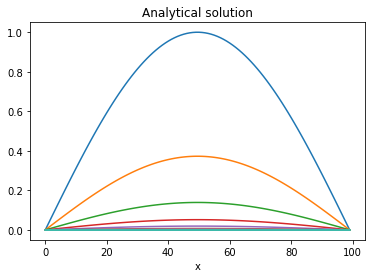

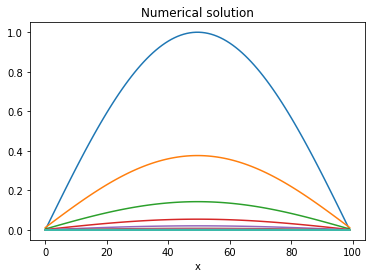

In [6]:
for i in range(0, N_t, 2000):
    plt.title('Analytical solution')
    plt.xlabel('x')
    plt.plot(u_a[i, :])
plt.show()
for i in range(0, N_t, 2000):
    plt.title('Numerical solution')
    plt.xlabel('x')
    plt.plot(u[i, :])
plt.show()